## ML LAB 08 - September 5, 2020 | Aaqib Ahmad (1947101)

## Implement Linear Regression and Demonstrate the Impact of Regularization 
- Using any Suitable Dataset of sklearn Library
- Generating a Synthetic Dataset for Regression using "make_regression" function.

## What is Linear Regression?

<img src='image_2.PNG'>

- Linear Regression is a **predictive modeling** technique. 
- It is used whenever there is a **linear relation** between the **dependent and the independent variables.**

### Importing the Necessary Libraries

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [230]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

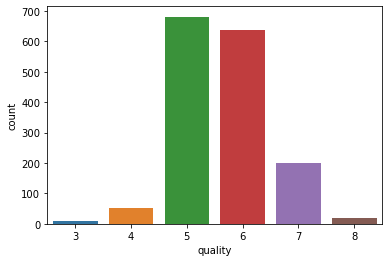

In [231]:
sns.countplot(x='quality', data=df)

Our wine scale ranges between 3 and 8. 
- There are some really good wines (7-8), while most of them have an **average quality between 5 and 6**, and some of them are really poor (3-4)

<AxesSubplot:>

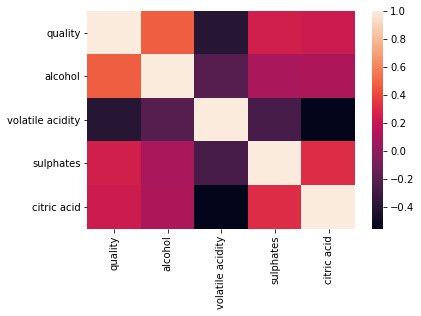

In [232]:
corr = df.corr()
idx = corr['quality'].abs().sort_values(ascending=False).index[:5]
idx_features = idx.drop('quality')
sns.heatmap(corr.loc[idx, idx])

According to the correlation matrix, the four more influential properties are:

1. Alcohol :
- Seems like a positive correlation: the more alcohol, the better the wine. Bibliography suggests there is an optimal value for alcohol around 13.6-14.0.

2. Volatil Acidity :
- This represents the presence of certain volatile acids, like acetic acid. Too much acetic acid is considered a wine fault. We've got a negative correlation here, which makes sense.

3. Sulphates : Weak Positive Correlation.

4. Citric Acid : May be added to wine to give a more 'fres' flavor. Weak positive correlation.

Let's now visualize the five most relevant variables and their interactions:

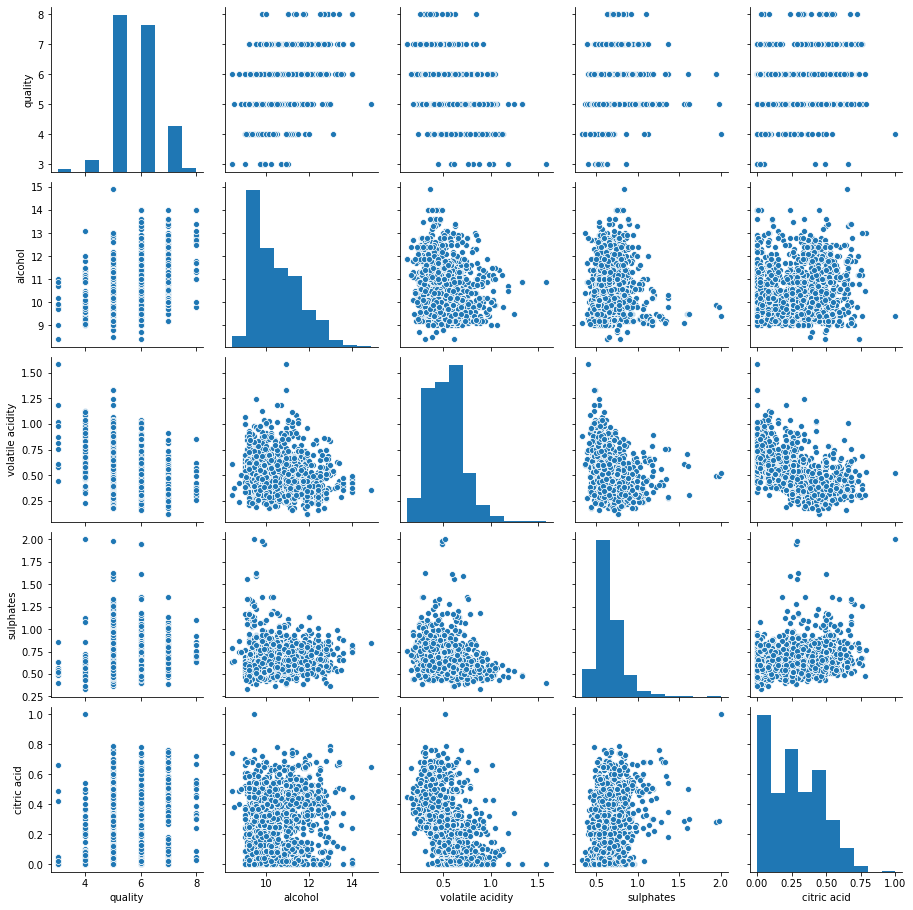

In [233]:
sns.pairplot(df, vars=idx)

In [234]:
df.isnull().sum() #Check for the Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [235]:
# Find correlations of each feature with the target variable (quality)

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [236]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [237]:
# Create vector X of input features (predictor)containing all features whose correlation is above 0.05 
# And a vector y which is containing the quality (target variable)

features = get_features(0.1)
print(features)
x = df[features]
y = df['quality'] 
x

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      total sulfur dioxide  density  sulphates  alcohol  
0                     34.0  0.99780       0.56      9.4  
1                     67.0  0.99680       0.68      9.8  
2                     54.0  0.99700       0.65      9.8  
3                     60.0  0.99800       0.58      9.8  
4                     34.0  0.99780       0.56      9.4  
...                    ...      ...        ...      ...  
1594                  44.0  0.99490       0.58     10.5  
1595                  51.0  0.99512       0.76     11.2  
1596                  40.0  0.99574       0.75     11.0  
1597                  44.0  0.99547       0.71     10.2  
1598                  42.0  0.99549       0.66     11.0  

[1599 rows x 8 columns]

In [252]:
# Create training and testing set using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
x_train.shape
y_train.shape 
x_test.shape 
y_test.shape

(400,)

In [253]:
# Build the linear regression model using LinearRegression()

regressor = LinearRegression()

# Fit the model to our training data

regressor.fit(x_train, y_train)

# Print the values of coefficients of each feature

print(regressor.coef_)

[ 2.10648295e-02 -1.14109146e+00 -7.61393540e-02 -1.83649783e+00
 -2.22817280e-03 -1.73845648e+01  8.80196253e-01  2.76441089e-01]


In [254]:
# Predict the quality of wine using our model (predict())

train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test)
print(test_pred)

[6.28149612 5.42008524 5.01982334 ... 6.4383732  5.27085515 6.034597  ]
[6.33250519 5.02072033 4.78275825 6.54019719 5.54354335 5.61100987
 6.36116679 5.70498508 5.42200132 5.66535555 4.97073865 6.74364817
 5.67993908 6.10591566 5.70049207 5.8760519  5.06743314 6.21134964
 6.00935094 5.31280496 6.0770808  5.67993908 5.72855382 5.41843734
 5.47122536 5.40878445 5.76383331 5.85315833 5.73095323 5.53563189
 5.13622453 6.52304424 5.5953637  5.15379431 6.35844732 4.86695602
 5.11614346 6.82876485 4.7941778  5.24195331 5.38210309 6.13866424
 5.72563323 5.26798815 5.31457063 4.77181718 5.30754152 5.12751514
 6.19611501 5.34096686 5.44777495 6.57747549 5.31952927 6.51605541
 4.7675494  6.503952   5.29854952 5.09695119 5.7577136  5.09578859
 5.07548877 5.63388995 5.23501792 5.93546633 6.52556599 6.19888708
 6.24140187 5.53394167 5.60612856 5.80534537 5.29924024 5.75153845
 6.0736347  6.04368274 5.69748193 5.24030388 5.06973798 5.10351386
 5.58650987 5.59121839 5.1145558  5.07341794 6.42967284 5

In [255]:
# Observe the differences between values (training and testing) predicted by the model and the actual values
# We use the root mean square error for this

rmse_train = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(rmse_train)

rmse_test = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(rmse_test)

### The RMSE for our training and testing sets are very similar which shows that our built model is a GOOD model ###

0.6431216710783415
0.667872445898791


In [256]:
# round off the predicted values of the test set

predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 5. 5. 7. 6. 6. 6. 6. 5. 6. 5. 7. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 5.
 5. 5. 6. 6. 6. 6. 5. 7. 6. 5. 6. 5. 5. 7. 5. 5. 5. 6. 6. 5. 5. 5. 5. 5.
 6. 5. 5. 7. 5. 7. 5. 7. 5. 5. 6. 5. 5. 6. 5. 6. 7. 6. 6. 6. 6. 6. 5. 6.
 6. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 5. 4. 6. 6. 5. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 6. 5. 6. 6. 7. 6. 5. 6. 5.
 6. 6. 5. 5. 6. 5. 7. 6. 6. 5. 6. 6. 5. 6. 5. 5. 6. 5. 6. 6. 5. 6. 6. 6.
 6. 5. 5. 6. 6. 7. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 5. 6. 7. 5. 5. 5. 5. 5.
 5. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6.
 6. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5.
 6. 6. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 5. 6. 6.
 5. 5. 6. 6. 5. 6. 5. 7. 5. 6. 6. 5. 6. 5. 5. 7. 5. 5. 5. 5. 5. 5. 6. 5.
 5. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 6. 5. 5. 6. 6.
 6. 6. 6. 6. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5. 6. 5. 5. 6. 5. 5. 6. 5. 5.
 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 5. 5. 5. 6. 7. 7. 5.

In [257]:
# Display coefficients of each feature

coefficients = pd.DataFrame(regressor.coef_, features) 
coefficients.columns = ['Coefficient']
print(coefficients)

## These coefficients show the impact of each value on the 'quality' as the target when all other features are fixed.
## an increase of 1 in alcohol will lead an increase of 0.28 in the Quality
## A 1 increase of 1 in chlorides will cause a decrease of 1.34 in Quality

                      Coefficient
fixed acidity            0.021065
volatile acidity        -1.141091
citric acid             -0.076139
chlorides               -1.836498
total sulfur dioxide    -0.002228
density                -17.384565
sulphates                0.880196
alcohol                  0.276441


In [258]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df1 = df.head(10)
df1

Actual  Predicted
912        6   6.332505
772        5   5.020720
1037       5   4.782758
1106       6   6.540197
263        5   5.543543
1029       7   5.611010
935        6   6.361167
1280       6   5.704985
31         6   5.422001
512        6   5.665356

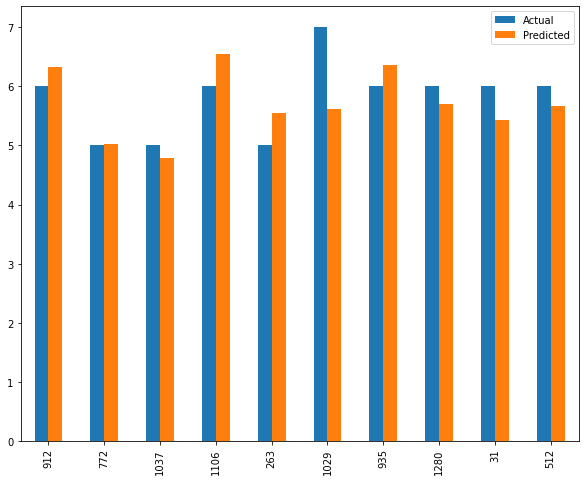

In [259]:
df1.plot(kind='bar',figsize=(10,8))
plt.show()

In [265]:
# Calculating other error functions

print('Mean Absolute Error     :', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error      :', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))

Mean Absolute Error     : 0.5387310533958011
Mean Squared Error      : 0.44605360399083355
Root Mean Squared Error : 0.667872445898791


#### Model and Evaluate with Default Parameters

In [269]:
# scale datasets manually
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [273]:
# create a function to fit and eveluate scores for default
def fit_and_evaluate_default(model, name):
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print('------------- {} default -------------'.format(name))
    print('R^2 score - ', r2_score(y_test, pred))
    print('MSE score - ', mean_squared_error(y_test, pred))
    print('MAE score - ', mean_absolute_error(y_test, pred))

In [280]:
# Default Linear Model Score

fit_and_evaluate_default(LinearRegression(), 'Linear Regression')
fit_and_evaluate_default(Lasso(random_state=123), 'Lasso Regularization')
fit_and_evaluate_default(Ridge(random_state=123), 'Ridge Regularization')

------------- Linear Regression default -------------
R^2 score -  0.2982164820786133
MSE score -  0.4460536039908334
MAE score -  0.5387310533958015
------------- Lasso Regularization default -------------
R^2 score -  -0.0007183498345706418
MSE score -  0.6360565831548531
MAE score -  0.6779316096747289
------------- Ridge Regularization default -------------
R^2 score -  0.29822835266613434
MSE score -  0.44604605904540506
MAE score -  0.5387337558052403


#### Model and Evaluate with HyperParameters and Tuning (Regularization)

In [281]:
# make pipeline and hyperparameters
pipeline = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
}
lasso_hyperparameters = {
    'lasso__alpha' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}
ridge_hyperparameters = {
     'ridge__alpha' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
}


In [287]:
# fit, tune and evaluate the models with hyperparameters
fitted_models = {}
for name, pip in pipeline.items():
    model = GridSearchCV(pip, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('-------------- {} HyperParameters --------------'.format(name))
    print('')
    fitted_models[name] = model
    print('R^2 Score - ', r2_score(y_test, test_pred))
    print('MSE Score - ', mean_squared_error(y_test, test_pred))
    print('MAE Score - ', mean_absolute_error(y_test, test_pred))
    print('')
# observations
# As we can see all the models with hyperparameters is doing great than default

-------------- lasso HyperParameters --------------

R^2 Score -  0.29821648207861307
MSE Score -  0.44605360399083355
MAE Score -  0.5387310533958011

-------------- ridge HyperParameters --------------

R^2 Score -  0.29821648207861307
MSE Score -  0.44605360399083355
MAE Score -  0.5387310533958011



## Generating a Synthetic Dataset for Regression using "make_regression" function.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [104]:
x, y = make_regression(n_samples=500, n_features=1, noise=20, bias=0)

Now, we have **1 Feature** and **200 Sample Values** in total. x holds all the feature values and y holds all the target values.

In [105]:
def plot_fig(x, y, b0, b1, name):
    plt.figure()
    
    plot_x = np.linspace(min(x), max(x), 500)
    plot_y = b0 + b1 * plot_x
    plt.scatter(x, y)
    plt.plot(plot_x, plot_y, color='red')
    plt.savefig(name)

It takes four arguments, the data points x, the targets y, and both of the simple linear regression parameters.

- Randomly initialize the values for **b0 and b1** so that we can visualize the initial linear model before any optimization. 
- Next will be optimizing the values to get the best linear model that we can

In [106]:
b0 = np.random.rand() #initializes the parameters b0 and b1 with random values.
b1 = np.random.rand()

Visualize the initial linear model and the data points, calling the plot_fig() function.

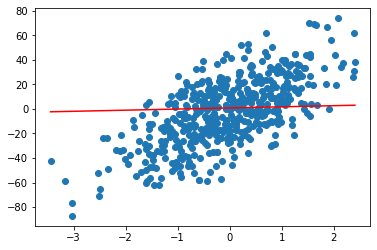

In [107]:
plot_fig(x, y, b0, b1, 'name')

The linear regression line is not at all a good fit, at least for now. Lets make it better

### Define the Cost Function
- To make the algorithm learn from data, we need to minimize some sort of cost function.
- In the case of Linear Regression, we are going to optimize the Mean Square Error (MSE). 

The following is the mathematical expression of MSE. (I am using a LaTeX-envs) for formulas in Math Form

\begin{equation}\label{eq:}
MSE =  \frac{1}{N} \sum_{i=1}^{n} (y_i – (m x_i + b))^2
\end{equation}

- Above function we will optimize the slope and intercept parameters.
- We use the Gradient Descent method. As we have to optimize both the parameters, we will have to use partial derivative for that. 

In [108]:
# cost function
def cost_function(x, y, b1, b0):
    num_values = len(x)
    total_error = 0.0
    for i in range(num_values):
        total_error += (y[i] - (b1*x[i] + b0))**2
    return total_error / num_values

### Update the Weights
- To optimize the parameters, we need to **update** them, and **use those updated values in each iteration**.
- We calculate the partial derivatives. Then we need to **update b0 and b1** by **subtracting the partial derivative values from b0 and b1.**

In [109]:
def update_weights(x, y, b1, b0, learning_rate):
    b1_deriv = 0
    b0_deriv = 0
    num_values = len(x)
    for i in range(num_values):
        # Calculate partial derivatives
        b1_deriv += -2*x[i] * (y[i] - (b1*x[i] + b0))
        b0_deriv += -2*(y[i] - (b1*x[i] + b0))
    # update the weights
    b1 -= (b1_deriv / num_values) * learning_rate
    b0 -= (b0_deriv / num_values) * learning_rate
    return b1, b0

#### The working of update_weight functions:
1. We pass the data points x and targets y as usual along with b0 and b1.
2. The fifth argument is the learning rate. Learning rate specifies how quickly our algorithm will converge to an optimal solution.
- Too High :  Miss the optimal solution because of very large steps. 
- Too Low  :  Steps will be more and the convergence may take a lot of time to happen.

### The Training Function
- same params as 'update_weight' + iterations
- 'iterations' defines how many times our algorithms will be trained on the data fully. 
- For a low learning rate, number iterations will be high and for a high learning rate, it will be less.

In [114]:
def train(x, y, b1, b0, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        b1, b0 = update_weights(x, y, b1, b0, learning_rate)
        # calculate the cost
        cost = cost_function(x, y, b1, b0)
        costs.append(cost)
        # plot the linear model
        if i % 50 == 0:
            plot_fig(x, y, b0, b1, name='linear-epoch-'+str(i))
    return b1, b0, costs

We will run the algorithm for 200 epochs and plot the linear model every 50 epochs to get a good look at the learning process. Also, the learning rate is going to be 0.01.

(array([17.67231394]),
 array([-1.14235283]),
 [array([689.84801518]),
  array([678.34812273]),
  array([667.31314047]),
  array([656.72417657]),
  array([646.56311058]),
  array([636.81256179]),
  array([627.45585892]),
  array([618.47701098]),
  array([609.86067944]),
  array([601.59215145]),
  array([593.65731422]),
  array([586.04263042]),
  array([578.73511463]),
  array([571.72231073]),
  array([564.9922702]),
  array([558.53353137]),
  array([552.33509948]),
  array([546.38642757]),
  array([540.67739814]),
  array([535.19830563]),
  array([529.93983951]),
  array([524.89306817]),
  array([520.04942341]),
  array([515.40068557]),
  array([510.9389693]),
  array([506.65670991]),
  array([502.54665024]),
  array([498.60182812]),
  array([494.8155643]),
  array([491.18145093]),
  array([487.69334045]),
  array([484.34533497]),
  array([481.1317761]),
  array([478.04723516]),
  array([475.08650379]),
  array([472.24458503]),
  array([469.51668461]),
  array([466.89820277]),
  array(

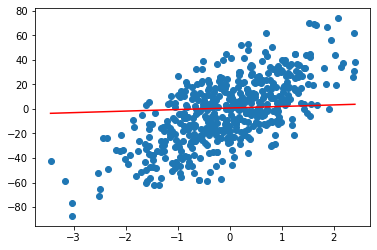

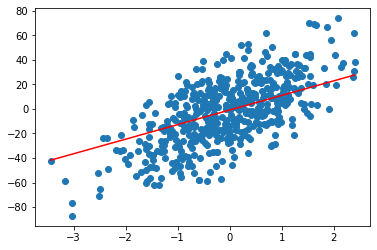

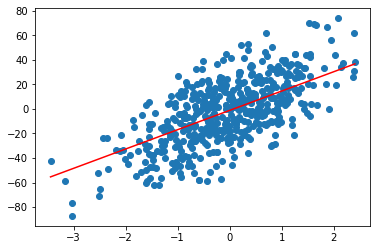

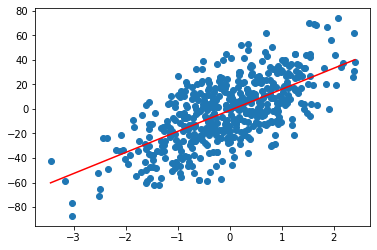

In [115]:
train(x, y, b1, b0, 0.01, 200)

By the end of 200 Epochs the model seems works pretty well.

===================================================================================== ML_LAB_08 | Aaqib Ahmad (1947101)